# Исследование

Получили ли приложения Apple Store лучшие отзывы, чем приложения Google Play?

### Этапы проекта
1. Загрузка данных
    * Загрузка двух наборов данных
    * Выберите столбцы, с которыми необходимо работать
    * Сгруппируйте данных на этой основе предыдущего пункта


2. Предобработка данных
    * Проверьте типы данных и исправьте их
    * Добавьте столбец platform в оба датарейма и Apple и Google
    * Измените имена столбцов для подготовки датафреймов к соединению
    * Объедините эти наборы данных
    * Удалите значения NaN
    * Отфильтровать только те приложения, которые были проверены хотя бы один раз
    * Проведите визуализацию данных  (по столбцу) platform просмотрев данные также аналитически)


3. Формулировка гипотезы (Получили ли приложения Apple Store лучшие отзывы, чем приложения Google Play?)
    * Получить распределение данных
    * Проверка теста


4. Выводы


## Импорт библиотек

Импортируем библтотеки pandas, numpy, scipy, random and matplotlib.pyplot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations
from scipy import stats
# random enables us to generate random numbers
import random

## Этап 1 - Загрузка данных

### 1a. Получение и загрузка данных
Давайте скачаем данные из Kaggle. Kaggle - фантастический ресурс: своего рода социальная среда для специалистов по обработке и анализу данных, он может похвастаться проектами, наборами данных и новостями о самых свежих библиотеках и технологиях в одном месте. Данные из Apple Store можно найти [здесь](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) , а данные из Google Store можно найти  [здесь](https://www.kaggle.com/lava18/google-play-store-apps). Загрузите наборы данных и сохраните их в рабочем каталоге.

In [ ]:
# Now that the files are saved, we want to load them into Python using read_csv and pandas.

# Create a variable called google, and store in it the path of the csv file that contains your google dataset.
# If your dataset is in the same folder as this notebook, the path will simply be the name of the file.
google = 'https://raw.githubusercontent.com/trisha00001/Data_Preprocessing/main/googleplaystore.csv'

# Read the csv file into a data frame called Google using the read_csv() pandas method.
Google = pd.read_csv(google,encoding='utf-8')

# Using the head() pandas method, observe the first three entries.
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
Google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Create a variable called apple, and store in it the path of the csv file that contains your apple dataset.
apple = 'https://raw.githubusercontent.com/trisha00001/Data_Preprocessing/main/AppleStore.csv'

# Read the csv file into a pandas DataFrame object called Apple.
Apple = pd.read_csv(apple,encoding='utf-8')

# Observe the first three entries like you did with your other data.
Apple.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1


In [ ]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

### 1b.  Выберите столбцы, с которыми мы будем работать¶
Из документации по этим наборам данных мы можем сделать вывод, что наиболее подходящими столбцами для ответа являются:
1. Гугл:
    * Category # Нужно ли нам это?
    * Rating
    * Reviews
    * Price (возможно)



2. Яблоко:
    * prime_genre # Нужно ли нам это?
    * user_rating
    * rating_count_tot
    * price (возможно)

### 1c. Выделим необходимые столбцы

Давайте выберем только те столбцы, с которыми мы хотим работать из обоих наборов данных. Мы перезапишем подмножества в исходных переменных.

In [ ]:
# Subset our DataFrame object Google by selecting just the variables ['Category', 'Rating', 'Reviews', 'Price']
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]

# Check the first three entries
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [ ]:
# Do the same with our Apple object, selecting just the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
Apple =Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

# Let's check the first three entries
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Social Networking,3.5,2974676,0.0
1,Photo & Video,4.5,2161558,0.0
2,Games,4.5,2130805,0.0


## Этап 2 -  Предобработка данных

### 2a. Проверьте типы данных и исправьте их

Типы имеют решающее значение для обработки и анализа данных в Python. Давайте определим, относятся ли переменные, выбранные в предыдущем разделе, к типам, которые они должны делать, или здесь есть какие-либо ошибки.

In [ ]:
# Using the dtypes feature of pandas DataFrame objects, check out the data types within our Apple dataframe.
# Are they what you expect?
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

Посмотрим дата фрейм Google

In [ ]:
# Using the same dtypes feature, check out the data types of our Google dataframe.
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

Странный. Типом данных для столбца «Цена» является «объект», а не числовой тип данных, такой как float или целое число. Давайте исследуем уникальные значения этого столбца.

In [ ]:
# Use the unique() pandas method on the Price column to check its unique values.
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

На самом деле здесь есть две проблемы.

- Во-первых, есть цена, которая называется . Это огромная ошибка! Everyone
- Во-вторых, везде есть символы доллара!

Давайте сначала обратимся к первому вопросу. Давайте проверим строки данных, которые имеют значение цены Everyone

In [ ]:
# Let's check which data points have the value 'Everyone' for the 'Price' column by subsetting our Google dataframe.

# Subset the Google dataframe on the price column.
# To be sure: you want to pick out just those rows whose value for the 'Price' column is just 'Everyone'.
Google[Google['Price']=='Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


Лишь одна строка, можно спокойно ее удалить

In [ ]:
# Let's eliminate that row.

# Subset our Google dataframe to pick out just those rows whose value for the 'Price' column is NOT 'Everyone'.
# Reassign that subset to the Google variable.
# You can do this in two lines or one. Your choice!
Google = Google[Google['Price']!='Everyone']

# Check again the unique values of Google
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Наша вторая проблема остается: символы доллара.

Это проблема, потому что Python фактически считает эти значения строками. Поэтому мы не можем выполнять математические и статистические операции над ними, пока не превратим их в числа.

In [ ]:
# Let's create a variable called nosymb.
# This variable will take the Price column of Google and apply the str.replace() method.
nosymb = Google['Price'].str.replace('$','')

# Now we need to do two things:
# i. Make the values in the nosymb variable numeric using the to_numeric() pandas method.
# ii. Assign this new set of numeric, dollar-sign-less values to Google['Price'].
# You can do this in one line if you wish.
Google['Price'] = pd.to_numeric(nosymb)

<ipython-input-13-780e4fc888ac>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nosymb = Google['Price'].str.replace('$','')


Теперь давайте снова проверим типы данных для нашего фрейма данных Google, чтобы убедиться, что столбец «Цена» действительно числовый.

In [ ]:
# Use the function dtypes.
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

Обратите внимание, что столбец по-прежнему является столбцом объекта. На самом деле нам нужно, чтобы этот столбец также был числовым столбцом. Reviews

In [ ]:
# Convert the 'Reviews' column to a numeric data type.
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [ ]:
# Let's check the data types of Google again
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

### 2b. Добавление столбеца 'platform' в оба датарейма и Apple и Google
Давайте добавим новый столбец к обоим объектам dataframe под названием: все его значения в dataframe Google будут просто «google», а все его значения для dataframe Apple будут просто «apple». platform

Причина, по которой мы делаем эту колонку, заключается в том, чтобы мы могли в конечном итоге объединить наши данные Apple и Google вместе и фактически проверить некоторые гипотезы для решения проблемы в нашем исследовании.

In [ ]:
# Create a column called 'platform' in both the Apple and Google dataframes.
# Add the value 'apple' and the value 'google' as appropriate.
Apple['platform'] = 'apple'
Google['platform'] = 'google'
Apple.head()
Google.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,google
1,ART_AND_DESIGN,3.9,967,0.0,google
2,ART_AND_DESIGN,4.7,87510,0.0,google
3,ART_AND_DESIGN,4.5,215644,0.0,google
4,ART_AND_DESIGN,4.3,967,0.0,google


### 2c. Изменим имена столбцов для подготовки датафреймов к соединению
Поскольку самый простой способ объединить два набора данных — это если они имеют оба:

- одинаковое количество столбцов
- те же имена столбцов, которые нам нужно переименовать, чтобы они совпадали с именами столбцов , или наоборот.AppleGoogle


В этом случае мы изменим имена столбцов на имена столбцов. AppleGoogle

Это важный шаг для унификации двух наборов данных!

In [ ]:
# Create a variable called old_names where you'll store the column names of the Apple dataframe.
# Use the feature .columns.
old_names = Apple.columns

# Create a variable called new_names where you'll store the column names of the Google dataframe.
new_names = Google.columns

# Use the rename() DataFrame method to change the columns names.
Apple = Apple.rename(columns = dict(zip(old_names,new_names)))
Apple.head()

,Category,Rating,Reviews,Price,platform
0,Social Networking,3.5,2974676,0.0,apple
1,Photo & Video,4.5,2161558,0.0,apple
2,Games,4.5,2130805,0.0,apple
3,Games,4.5,1724546,0.0,apple
4,Music,4.0,1126879,0.0,apple


### 2d. Объединение этих наборов данных
Давайте объединим два набора данных в один фрейм данных под названием .df

In [ ]:
# Let's use the append() method to append Apple to Google.
df = Google.append(Apple,ignore_index=True)

# Using the sample() method with the number 12 passed to it, check 12 random points of your dataset.
df.sample(12)

<ipython-input-19-90f671eeb871>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = Google.append(Apple,ignore_index=True)


,Category,Rating,Reviews,Price,platform
8949,PHOTOGRAPHY,4.0,223,0.00,google
11797,Games,4.5,11154,4.99,apple
4033,COMMUNICATION,4.5,305347,0.00,google
3592,PARENTING,4.6,62386,0.00,google
5850,BOOKS_AND_REFERENCE,4.2,27,0.00,google
919,ENTERTAINMENT,3.9,60841,0.00,google
15067,Utilities,2.5,138,1.99,apple
3699,VIDEO_PLAYERS,4.6,36969,0.00,google
6090,FAMILY,3.8,63,0.00,google
10208,FAMILY,4.5,6396,0.00,google


### 2e. Устранение значений NaN

Как видите, есть некоторые значения. Мы хотим исключить все эти значения из таблицы.NaN

In [ ]:
df.shape

(18037, 5)

In [ ]:
MissingValue = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

,MissingValue,Percent
Rating,1474,8.172091
Category,0,0.000000
Reviews,0,0.000000
Price,0,0.000000
platform,0,0.000000


In [ ]:
# Lets check first the dimesions of df before droping `NaN` values. Use the .shape feature.


# Use the dropna() method to eliminate all the NaN values, and overwrite the same dataframe with the result.
df.dropna(inplace =True)

# Check the new dimesions of our dataframe.
df.shape

(16563, 5)

### 2f. Отфильтровать только те приложения, которые были скачены хотя бы один раз

Приложения, которые еще не были рассмотрены, не могут помочь нам решить нашу задачу.

Итак, давайте проверим, нет ли у каких-либо приложений вообще отзывов.

In [ ]:
# Subset your df to pick out just those rows whose value for 'Reviews' is equal to 0.
# Do a count() on the result.
df[df['Reviews']==0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

929 приложений не имеют отзывов, нам нужно удалить!

In [ ]:
# Eliminate the points that have 0 reviews.
df = df[df['Reviews']!=0]
df.shape

(15634, 5)

### 2g.Прведите визуализацию данных (по столбцу) platform просмотрев данные также аналитически)

То, что нам нужно, чтобы решить в нашем исследовании - это резюме столбца, но разделенное различными платформами.Rating

In [ ]:
# To summarize analytically, let's use the groupby() method on our df.
df['Rating'].groupby(df['platform']).describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


Средние значения **4.049697** и **4.191757** не кажутся такими уж разными! Возможно, мы уже решили нашу задачу: нет существенной разницы между обзорами приложений Google Play и обзорами приложений Apple Store. Здесь мы наблюдаем разницу: которая составляет просто (4,191757 - 4,049697) = 0,14206. Это просто фактическая разница, которую мы наблюдали между средним рейтингом для приложений из Google Play и средним рейтингом для приложений из Apple Store. Давайте посмотрим, как мы собираемся использовать эту наблюдаемую разницу для решения нашей проблемы с помощью статистического теста.

**Краткое описание нашего метода:**

- Мы предположим, что платформа (то есть, было ли приложение Google или Apple) действительно не влияет на рейтинги.
- Учитывая это предположение, мы должны быть в состоянии получить разницу в среднем рейтинге для приложений Apple и среднем рейтинге для приложений Google, который очень похож на тот, который мы фактически получили (0,14206), просто путем: а. перетасовки столбца рейтингов, б. сохранения столбца платформы прежним, c. расчета разницы между средним рейтингом для Apple и средним рейтингом для Google.
- Мы можем сделать перетасовку более полезной, делая это много раз, каждый раз вычисляя средний рейтинг для приложений Apple и средний рейтинг для приложений Google, а также разницу между этими средствами.
- Затем мы можем взять среднее значение всех этих различий, и это будет называться нашей перестановочной разницей. Эта разница перестановок будет отличным показателем того, какой была бы разница, если бы наше первоначальное предположение было верным, а платформа действительно не влияет на рейтинги.
- Теперь сделаем сравнение. Если наблюдаемая разница выглядит так же, как разница перестановок, то мы придерживаемся утверждения, что на самом деле платформа не влияет на рейтинги. Если вместо этого разница перестановок существенно отличается от наблюдаемой разницы, мы заключим: что-то происходит; платформа действительно влияет на рейтинги.
- Что касается определения значимости, то мы к этому и дошли. [ресурс](https://www.springboard.com/archeio/download/4ea4d453b0b84014bcef287c50f47f00/).

Давайте также получим **визуально** наш столбц, разделенного различными платформами. Rating

Хорошим инструментом для использования здесь является boxplot

<Axes: title={'center': 'Rating'}, xlabel='platform'>

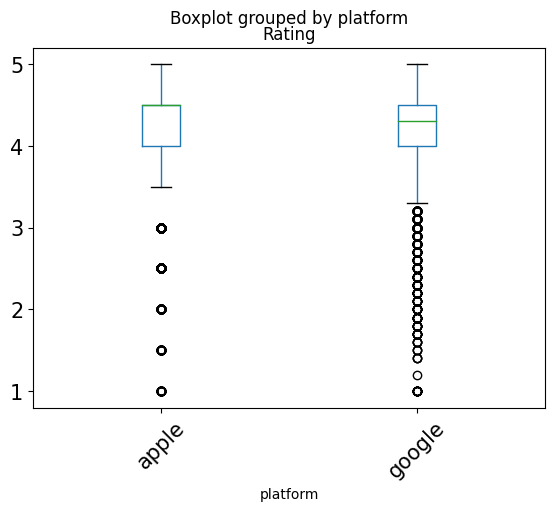

In [ ]:
# Call the boxplot() method on our df.
df.boxplot(by='platform', column = 'Rating', grid=False, rot=45, fontsize=15)

Здесь мы видим ту же информацию, что и в аналитическом резюме, но с бокс-сюжетом. Видите, как здесь работает boxplot? Если вам нужно пересмотреть свои boxplots, проверьте эту ссылку. [Ссылка](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

## Этап 3 - Проверка гипотезы

### Формулировка гипотезы¶
Наша **нулевая гипотеза**:

H0: наблюдаемая разница в среднем рейтинге приложений Apple Store и Google Play обусловлена случайностью (а  не платформой).(**В среднем рейтинги одинаковые**)

**альтернативная гипотеза**:

H1: наблюдаемая разница в средних рейтингах пользователей Apple и Google обусловлена не случайностью (а фактически обусловлена платформой)

Мы также выберем уровень значимости 0,05.

### 3b. Получение распределения данных¶
Теперь, когда гипотезы и уровень значимости определены, мы можем выбрать статистический тест, чтобы определить, какую гипотезу принять.

Существует множество различных статистических тестов, все с разными допущениями. Вы создадите отличное суждение о том, когда использовать какие статистические тесты в курсе Data Science Career Track. Но в целом, одной из самых важных вещей, которые нужно определить, является **распределение данных**.

In [ ]:

import scipy.stats as stat

In [ ]:
# Create a subset of the column 'Rating' by the different platforms.
# Call the subsets 'apple' and 'google'
apple = df[df['platform'] == 'apple']['Rating'].sample(70).sort_values()
google= df[df['platform'] == 'google']['Rating'].sample(210).sort_values()

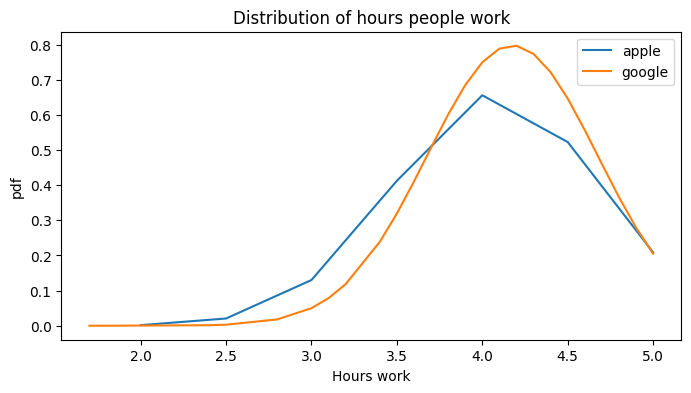

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

hour_data_fit1 = stat.norm.pdf(apple, apple.mean(), apple.std())
ax.plot(apple, hour_data_fit1, label='apple')

hour_data_fit2 = stat.norm.pdf(google, google.mean(), google.std())
ax.plot(google, hour_data_fit2, label='google')

plt.title('Distribution of hours people work')
plt.xlabel('Hours work')
plt.ylabel('pdf')
plt.legend()

In [ ]:
results = stat.levene(apple, google)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.03487754834149669
Отклонить гипотезу о равенстве дисперсий


In [ ]:
Ho = "В среднем рейтинг игр платформы Apple и Google одинаковый"   # Stating the Null Hypothesis
Ha = "В среднем рейтинг игр платформы Apple и Google различный"

Отвергните нулевую гипотезу.

In [ ]:

t,p_value  = stats.ttest_ind(apple, google,equal_var=False)

if p_value < 0.05:
    print(f'{Ha} так как  p_value {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} так как p_value {p_value.round(3)} > 0.05')

В среднем рейтинг игр платформы Apple и Google одинаковый так как p_value 0.259 > 0.05
